## Text classification with movie reviews 
- Data set : IMDB dataset (25,000 training set, 25,000 test set)
- The purpose is classifies movie reviews as positive or negative (Binary classification)
- Keras(Embedding layer, AvgPooling layer, Dense Layer(relu, sigmoid)
- Padding for same input length

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

1.11.0


### Download the IMDB dataset
- review 데이터가 다 integer로 변환되어 있음(워드 임베딩)

In [6]:
imdb = keras.datasets.imdb
# top 10,000개의 단어 가져옴
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Explore the data 

TypeError: 'NoneType' object is not callable

In [7]:
print("Traing data :{}, labels: {}".format(len(train_data), len(train_labels)))

Traing data :25000, labels: 25000


In [16]:
print("Test data : {}, labels: {}".format(len(test_data), len(test_labels)))

Test data : 25000, labels: 25000


In [9]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [17]:
# data마다 길이가 다름 (리뷰 길이가 다름)
# input은 같은 길이가 되야한다 
len(train_data[0]), len(train_data[1])

(218, 189)

### Convert the integers back to words 

In [37]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

In [38]:
type(word_index)

dict

In [39]:
len(word_index)

88584

In [33]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [48]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

In [41]:
len(word_index)

88588

In [49]:
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [50]:
reverse_word_index

{34707: 'fawn',
 52012: 'tsukino',
 52013: 'nunnery',
 16822: 'sonja',
 63957: 'vani',
 1414: 'woods',
 16121: 'spiders',
 2351: 'hanging',
 2295: 'woody',
 52014: 'trawling',
 52015: "hold's",
 11313: 'comically',
 40836: 'localized',
 30574: 'disobeying',
 52016: "'royale",
 40837: "harpo's",
 52017: 'canet',
 19319: 'aileen',
 52018: 'acurately',
 52019: "diplomat's",
 25248: 'rickman',
 6752: 'arranged',
 52020: 'rumbustious',
 52021: 'familiarness',
 52022: "spider'",
 68810: 'hahahah',
 52023: "wood'",
 40839: 'transvestism',
 34708: "hangin'",
 2344: 'bringing',
 40840: 'seamier',
 34709: 'wooded',
 52024: 'bravora',
 16823: 'grueling',
 1642: 'wooden',
 16824: 'wednesday',
 52025: "'prix",
 34710: 'altagracia',
 52026: 'circuitry',
 11591: 'crotch',
 57772: 'busybody',
 52027: "tart'n'tangy",
 14135: 'burgade',
 52029: 'thrace',
 11044: "tom's",
 52031: 'snuggles',
 29120: 'francesco',
 52033: 'complainers',
 52131: 'templarios',
 40841: '272',
 52034: '273',
 52136: 'zaniacs',

In [51]:
# vectors --> words 
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text ])

In [44]:
reverse_word_index.get(1)

'<START>'

In [45]:
reverse_word_index.get(14)

'this'

In [52]:
decode_review(train_data[0])

"<START> in with i like horrible business chinese charm would killer waited which explosion ? going at fun UNK film make like lame character has novel <UNK> a all final sense UNK real ? find character nothing <UNK> second perhaps they ? find valuable cover this city an br overall ? horror has i UNUSED should shop was in with ? delightful 00 despite ? with their people is i like horrible an well it br garbage ? with this genre this is i taken that <UNK> UNK she sex is and house and after UNK ? product bud i final which returned be ? does is i an annoying UNK film where if at man it's film sent be UNUSED with is comedy you than some UNK in perfect i get <UNK> and ? think plot windows it fun ? <UNK> the lou UNK sequence at their like horrible wanted on getting night just the ? <UNK> rich br any other ? couple it someone then he decade more on why UNUSED can't ajay that ? family with for still wanted on final UNK such his lindsay that if at you interesting how film any ? family would i an 

### Prepare the data
- integer로 구성된 review를 neural network에 넣기 위해 tensor로 변환해야한다.
    + One-hot-encode: index번호를 1로하고 나머지는0인 벡터로 만든다. `num_words * num_reviews`
    + Pad : input 값을 same length로 맞춰줌.`max_length * num_reviews`

In [53]:
# using pad_sequences function to standardize the lengths
train_data = keras.preprocessing.sequence.pad_sequences(train_data, 
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, 
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

In [56]:
len(train_data[0]) ,len(train_data[1])

(256, 256)

In [57]:
# post padding 적용해서 뒤에 패딩 인텍스 0 붙음 
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### Build the model 
- Hidden units
 + If a model has more hidden units (a higher-dimensional representation space), and/or more layers, then the network can learn more complex representations. However, it makes the network more computationally expensive and may lead to learning unwanted patterns—patterns that improve performance on training data but not on the test data. This is called overfitting, and we'll explore it later.   

In [58]:
# input shape은 moview reviews의 개수 (10,000 reviews)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


### Compile the model
- Loss function and optimizer 
    + Binary_crossentropy: 확률 분포사이의 거리를 다룰때 유용
    (between the ground-truth distributhion and the predictions)
    
    + MSE(Mean squared Error): regression problems

In [59]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Create a validation set 
- training하기 전에 이전에 보지 못했던 데이터에 대한 모델의 정확성을 확인
- validation set: 10,000 of training set 
- test dataset을 쓰지 않는 이유?: 목표는 training data만을 사용하여 모델을 튜닝하는 것. test data는 오직 한번만 사용

In [61]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

#labels
y_val = train_labels[:10000]
partial_y_train= train_labels[10000:]

### Train the model 
- Epochs: 40
- Mini-batch: 512 samples

In [62]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 157us/step - loss: 0.6918 - acc: 0.5333 - val_loss: 0.6901 - val_acc: 0.5496
Epoch 2/40
15000/15000 [==============================] - 2s 115us/step - loss: 0.6863 - acc: 0.6047 - val_loss: 0.6825 - val_acc: 0.6878
Epoch 3/40
15000/15000 [==============================] - 2s 131us/step - loss: 0.6739 - acc: 0.7103 - val_loss: 0.6668 - val_acc: 0.7223
Epoch 4/40
15000/15000 [==============================] - 2s 138us/step - loss: 0.6514 - acc: 0.7577 - val_loss: 0.6418 - val_acc: 0.7441
Epoch 5/40
15000/15000 [==============================] - 2s 140us/step - loss: 0.6182 - acc: 0.7859 - val_loss: 0.6064 - val_acc: 0.7824
Epoch 6/40
15000/15000 [==============================] - 2s 161us/step - loss: 0.5763 - acc: 0.8099 - val_loss: 0.5657 - val_acc: 0.8040
Epoch 7/40
15000/15000 [==============================] - 2s 121us/step - loss: 0.5294 - acc: 0.8306 - val_loss: 0.5228 - 

### Evaluate the model

In [63]:
# error, accuracy
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 37us/step
[0.326251391582489, 0.87284]


### Create a graph of acc and loss over time 
There are four entries: one for each monitored metric during training and validation. We can use these to plot the training and validation loss for comparison, as well as the training and validation accuracy:

In [64]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [65]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

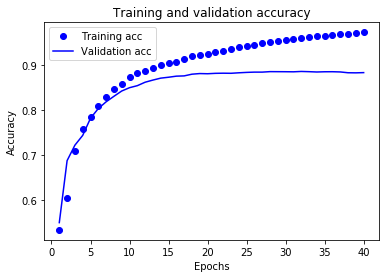

In [67]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
# epochs = 20 쯤에서 model이 unseen data(validation set)에 대해 못맞추고 있는 경향이 있음 
# 이는 overfitting 현상: training acc는 올라가는데 validation acc는 내려가고 있으므로 
# 따라서 early stopping으로 overfitting을 극복할 수 있을 수도 있겠다